# Classical/Frequentist Statistical Inference: II

## Fitting A Line To Data <a class="anchor" id="one"></a>


Most common tasks in statistical inference: **fitting a line to data**. Power-law relationships ($y\propto x^\alpha$) become linear relationships in log-log space ($\ln y \propto \alpha\ln x + \mathrm{constant}$).

Assume the noise/scatter in our measurements (the residuals) is generated by a Gaussian process, i.e.:

$$ y_i = a x_i + b + r_i $$

where $r_i$ is drawn from $N(0, \sigma)$. Here, $\sigma$ is the measurement uncertainty, which we take to be the same for all points. The data model includes a linear relationship with two parameters $a,b$: hence the model is written as $M(a,b)$.

Let us compute the likelihood. First, we ask ourselves what is the probability $p(y_i|x_i, M(a, b), \sigma)$ that a particular point $y_i$ would be measured. It is just the normal distribution:

$$ p(y_i|x_i, M(a, b), \sigma) = N(y_i - M(x_i)|\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(y_i - M(x_i))^2}{2 \sigma^2} \right). $$

The likelihood for all data points is given by the product over $N$ of these terms. Given our previous definitions we can then write down the $\ln L$ as

$$ \ln L(a, b) = \mathrm{constant} - \frac{1}{2} \sum_{i=1}^N \frac{(y_i - M(x_i))^2}{\sigma^2} = \mathrm{constant} - \frac{1}{2} \chi^2$$

This is the expression that we now ***maximize*** with respect to $a$ and $b$ to find ML estimators for those parameters. This is equivalent to ***minimizing*** the sum of the squares (the $\chi^2$) in a *least-squares method*.

We now read in some almost linear data. For instance, these could be measures of the mass of supermassive black holes as a function of their galactic hosts (the so-called $M$-$\sigma$ relationship).

![](https://s3.amazonaws.com/aasie/images/0004-637X/764/2/184/apj459110f1_lr.jpg)


*Revisiting the Scaling Relations of Black Hole Masses and Host Galaxy Properties*, McConnell & Ma 2013 The Astrophysical Journal 764 184.

Our simplified data contains some **poorly modeled outliers**, which have very different uncertainties from what we assume. Say those galaxies have some features (SMBHs are actively accreting) that makes them different.


### How do we deal with outliers: modifying the likelihood

- Summing the squares of the residuals ($\chi^2=\sum_{i=1}^N (y_i - M(x_i))^2/\sigma^2$) is sensitive to outliers.

- The $\chi^2$ is an example of an $L_2$ norm (different L, not likelihood), where the [$L_p$ norm](https://www.wikiwand.com/en/Lp_space) can be defined as $\sum_{i=1}^N (y_i -M(x_i))^p/\sigma^p$.

- A number of approaches exist for correcting for outliers.

- These include "sigma-clipping", using interquartile ranges (previous lectures), taking the median of solutions of subsets of the data, and least trimmed squares (which searches for the subset of points that minimizes $\sum_i^N (y_i - \theta_ix_i)^2$), all the way to modern machine-learning solutions like [RANSAC](https://en.wikipedia.org/wiki/Random_sample_consensus).


A standard approach is also changing the **likelihood** to reduce the weight of outliers. This is known as the **Huber loss function**

$$ \sum_{i=1}^N e(y_i|y),$$

where

$$ 
e(t) = \left\{
            \begin{array}{ll}
            \frac{1}{2} t^2 & \mbox{if} \; |t| \leq c, \\
            c|t| - \frac{1}{2} c^2 & \mbox{if} \; |t| \geq c,
            \end{array}
        \right ) 
$$

and 

$$ t = \left|\frac{y-M(x)}{\sigma}\right|.$$

This is continuous and differentiable, and transitions to an $L_1$ norm ($\sum_{i=1}^N |y_i - M(x_i)|$) for large data excursions, which downweights the outlier points.

In the image below, the blue curve is the usual $\chi^2$, $L_2$ parabola shape that we attempt to minimize, whereas the green is the alternative Huber loss function that downweights outliers.

![title](https://upload.wikimedia.org/wikipedia/commons/c/cc/Huber_loss.svg)

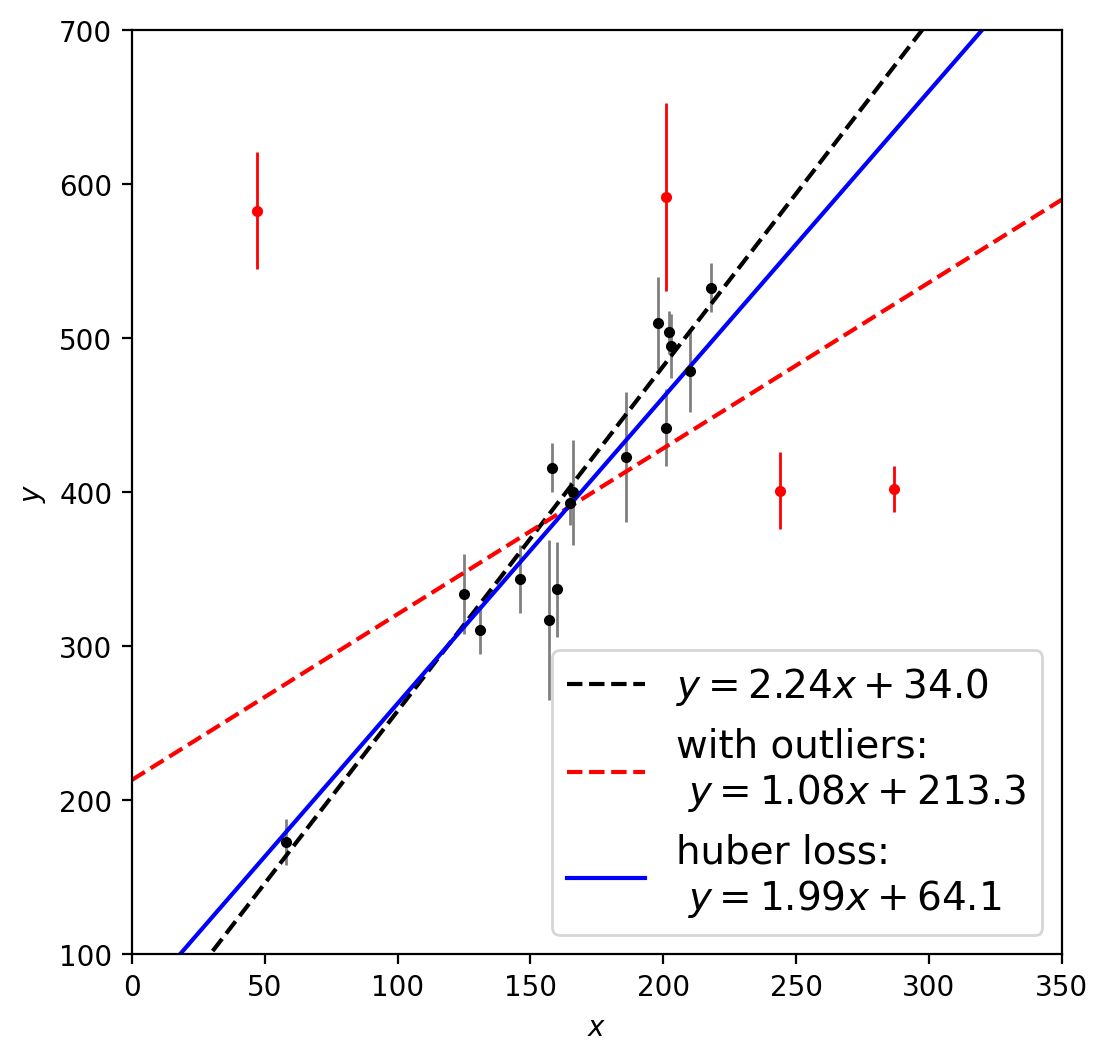

In [19]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

# plot the data without outliers in gray
ax.errorbar(x[4:], y[4:], dy[4:], 
            fmt='.k', lw=1, ecolor='gray')
# plot the outliers in red
ax.errorbar(x[:4], y[:4], dy[:4], 
            fmt='.', lw=1, color='red')

x_fit = np.linspace(0, 350, 10)
# plot the regular fit from before without outliers
ax.plot(x_fit, beta_mle[0] * x_fit + beta_mle[1], 
        ls='--', color='k',
        label="$y=%.2fx + %.1f$" % tuple(beta_mle))
# plot the fit that includes outliers
ax.plot(x_fit, beta_mle_outlier[0] * x_fit + beta_mle_outlier[1], 
        ls='--', color='red',
        label="with outliers:\n $y=%.2fx + %.1f$" % tuple(beta_mle_outlier))
# plot the fit with the huber likelihood, downweighting outliers
ax.plot(x_fit, beta_huber[0] * x_fit + beta_huber[1], 
        ls='-', color='blue',
        label="huber loss:\n $y=%.2fx + %.1f$" % tuple(beta_huber))

ax.set_xlim(0, 350)
ax.set_ylim(100, 700)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.legend(loc=4, prop=dict(size=14))

plt.show()

We're frequentists in this lecture, but note how we're still putting prior information into the analysis. We **know** that the error bar on those red points are wrong (they're too small!) so we downeight them accordingly.

## Goodness Of Fit & Model Comparison <a class="anchor" id="two"></a>

The MLE approach tells us what the "best" model parameters are, but not how good the fit actually is. If the model is wrong, "best" might not be particularly revealing! 

Remember this acronym from the dawn of the computer age: ***GIGO = Garbage In, Garbage Out***. 

If we have a crappy model then we shouldn't expect a good fit to the data. For example, if you have $N$ points drawn from a linear distribution, you can always fit the data perfectly with an $N-1$ order polynomial. But that won't help you predict future measurements.

We can describe the **goodness of fit** in words as simply the followng

> *The goodness of fit tells us whether or not it is likely to have obtained the maximum (log-)likelihood $\ln L^0$.* 

Using the best-fit parameters of a model, the maximum likelihood value $L^0$ should not be an unlikely occurence. If it is, then our model is not describing the data well. Thus we need to know the *distribution* of $\ln L$ and not just its maximum. For the Gaussian case we have just described, we do a standard transform of variables and compute the so-called $z$ score for each data point (basically the number of standard deviations away from the mean that this point is), writing 

$$z_i = (x_i-\mu)/\sigma,$$ 

then

$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N z_i^2 = {\rm constant} - \frac{1}{2}\chi^2.$$

Here, $\chi^2$ is the thing whose distribution we discussed in early lectures. (Remember: that was precisely the  distribution of the sum of squared gaussian variates...)

**So for Gaussian uncertainties, $\ln L$ is distributed as $\chi^2$.**  Let's rememember how the $\chi^2$ distribution looks like. We've seen this already:

/Users/dgerosa/box/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


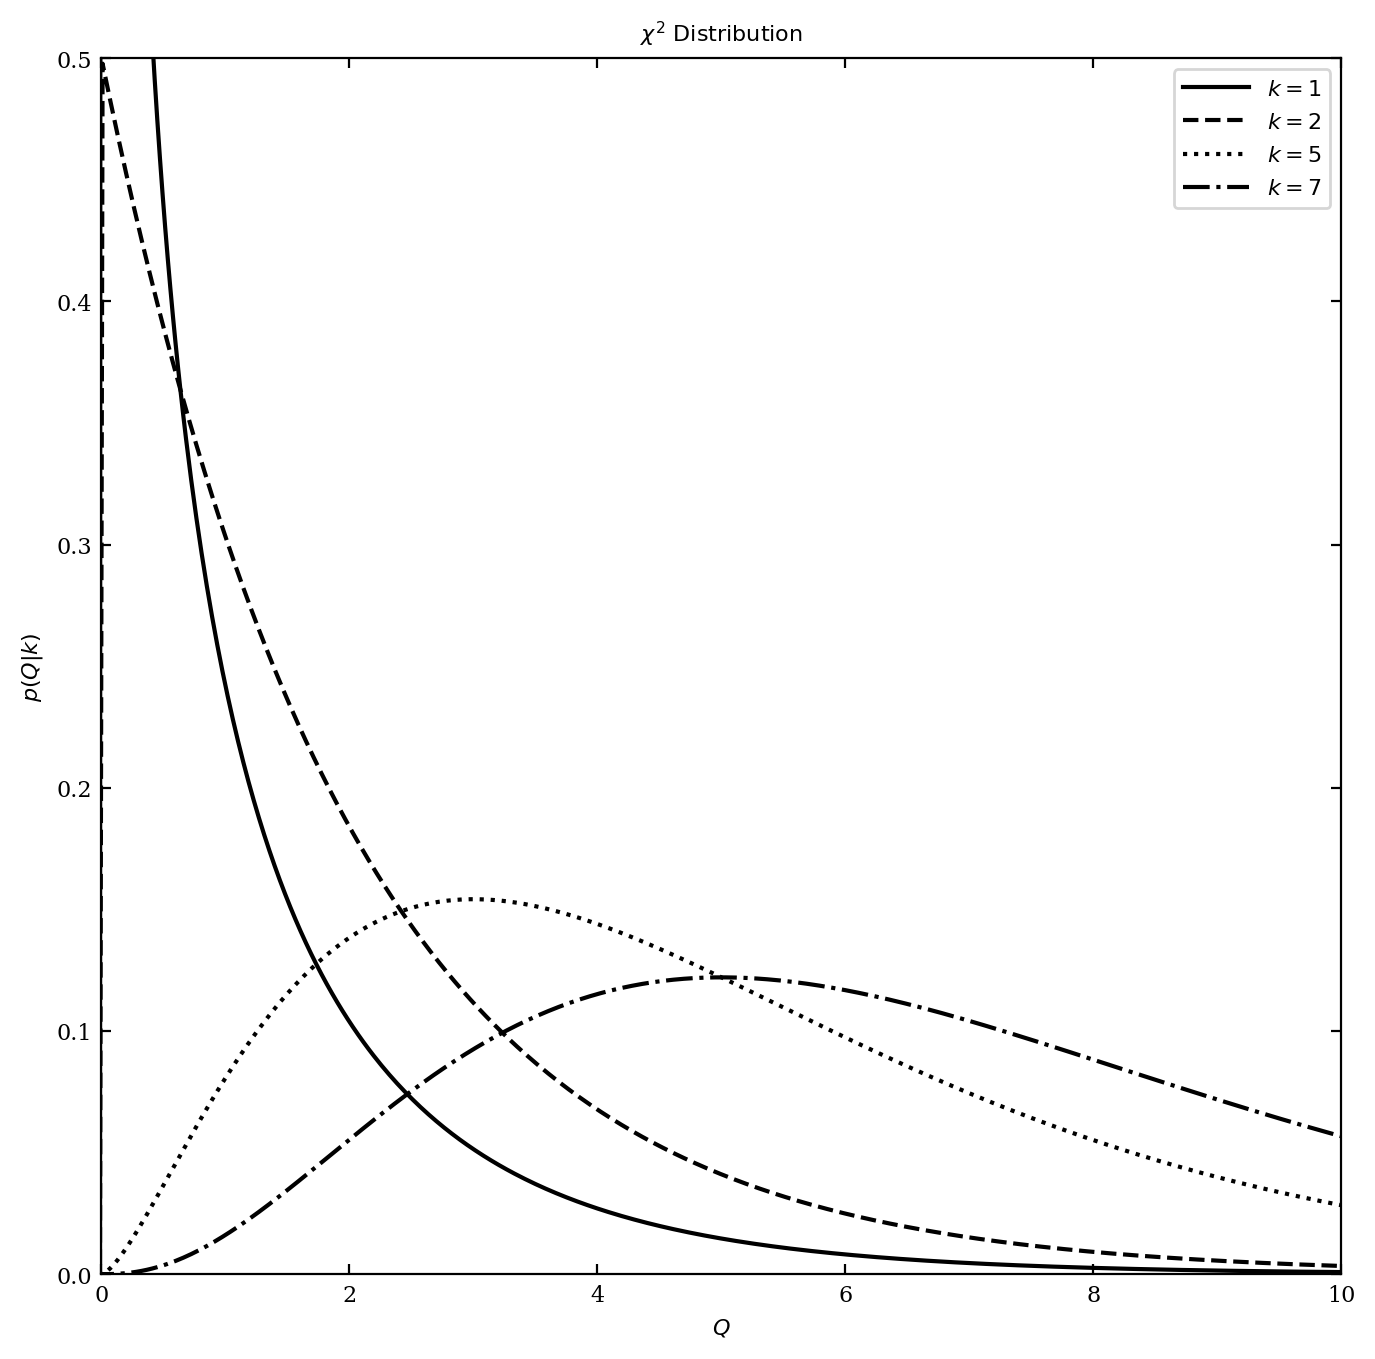

In [21]:
"""
Example of a chi-squared distribution
---------------------------------------
Figure 3.14.
This shows an example of a :math:`\chi^2` distribution with various parameters.
We'll generate the distribution using::
    dist = scipy.stats.chi2(...)
Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:
* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions
* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions
* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution
Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import chi2
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
k_values = [1, 2, 5, 7]
linestyles = ['-', '--', ':', '-.']
mu = 0
xx = np.linspace(-1, 20, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8,8))
fig.subplots_adjust(bottom=0.12)

for k, ls in zip(k_values, linestyles):
    dist = chi2(k, mu)

    plt.plot(xx, dist.pdf(xx), ls=ls, c='black',
             label=r'$k=%i$' % k)

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$Q$')
plt.ylabel(r'$p(Q|k)$')
plt.title(r'$\chi^2\ \mathrm{Distribution}$')

plt.legend()
plt.show()

***The mean of the $\chi^2$ distribution is $N-k$ and its standard deviation is $\sqrt{2(N-k)}$.***

We define the $\chi^2$ per degree of freedom, $\chi^2_\mathrm{dof}$, as

$$\chi^2_\mathrm{dof} = \frac{1}{N-k}\sum_{i=1}^N z^2_i.$$

where $k$ is the number of model parameters determined from the data.

- For a good fit, we would expect that $\chi^2_\mathrm{dof}\approx 1$. 
- If $\chi^2_\mathrm{dof}$ is significantly larger than 1, or $(\chi^2_\mathrm{dof}-1)>> \sqrt{2/(N-k)}$, then it is likely that we are not using the correct model.
- If data uncertainties are **(over)under-estimated** then this can lead to improbably **(low)high $\chi^2_\mathrm{dof}$**, as seen below.  

![Ivezic, Figure 4.1](http://www.astroml.org/_images/fig_chi2_eval_1.png)

Compute $\chi^2_\mathrm{dof}-1$ for the line fitted without outliers and fitted with outliers. These will be compared to the standard deviation of the $\chi^2_\mathrm{dof}-1$ distributions.

### Model Comparison

The distribution of $\ln L$ can only be related to the $\chi^2$ distribution whenever the likelihood is Gaussian. For non-Gaussian likelihoods we can still rank different models in terms of their respectively computed maximum likelihood values, $L^0$. This is only really fair if the models have the same number of parameters.

Let's do that for the data above that contains outliers, both for a model based on the naive squared loss function ($\chi^2$), and a Huber loss function model.

In [23]:
# compute a quantity related to lnL0 for the 
# squared loss function
lnL_sq = - squared_loss(beta_mle_outlier[0], 
                        beta_mle_outlier[1], 
                        x=x, y=y, dy=dy)

# compute a quantity related to lnL0 for the 
# Huber loss function
lnL_huber = - huber_loss(beta_huber[0], 
                         beta_huber[1], 
                         x=x, y=y, dy=dy)

print("Maximum log likelihood for squared loss = %.1f" % lnL_sq)
print("Maximum log likelihood for Huber loss = %.1f" % lnL_huber)

Maximum log likelihood for squared loss = -290.0
Maximum log likelihood for Huber loss = -43.4


Unsurprisingly, the Huber loss function model is much much better (that's in log!).

### Occam's razor

We need a modified approach whenever the models we're comparing have different numbers of parameters. Such an approach should account for **model complexity** and **effectively penalize models with additional parameters that are not constrained by the data**. This is often called an ***Occam penalty***, because we're trying to incorporate [Occam's Razor](https://www.wikiwand.com/en/Occam%27s_razor#:~:text=Occam's%20razor%2C%20Ockham's%20razor%2C%20Ocham's,is%20usually%20the%20right%20one.).

> *All else being equal (i.e., each model fits the data equally well), the less complex model is favored.*


We'll meet this in extensive detail later, especially in a Bayesian context. But a popular general-purpose tool for model comparison is the **Akaike Information Criterion** (AIC):

$$ \mathrm{AIC}_M \equiv -2\ln[L^0(M)] + 2k + \frac{2k(k+1)}{N-k-1}, $$

where $k$ is the number of model parameters and $N$ is the number of data points.

- For a Gaussian distribution, the first term is equal to $\chi^2$.
- **The model with lowest AIC is the most favored.**
- If all models are equally successful at fitting the data (equal $L^0$ values) then the second and third terms penalize model complexity such that the model with fewest free parameters wins. 

The AIC is a good quick and dirty estimate for the goodness of fit based on some asymptotic approximations. The preferred approach is **cross validation**. Cross validation is at the heart of all deep-learning workflows and will be explored later in the course.

## Confidence Estimating: Bootstrap & Jackknife <a class="anchor" id="three"></a>

Most ways of computing confidence limits and uncertainties on measured model parameters assume that the distribution is Gaussian and our samples are large. 

**More generally, computing uncertainties on a given estimator requires knowing its distribution.** Often that's complicated or impossibile.

Boostrap and jackknife are the two modern approaches to the problem, which have been made possible by the available computing power. They both rely on ***resampling*** strategies.

Remember that we have a data set $\{x_i\}$ from which we have estimated the distribution as $f(x)$ for a true distribution $h(x)$.  

### Bootstrap Method

In bootstrapping, we map the uncertainty of model parameters by re-sampling from our data (with replacement) $B$ times. This is relatively new (Efron, 1979) and was named in inspiration of "*pulling oneself up by one's bootstraps*".

It's a way of saying that one creates information seemingly out of nothing. Of course that's not the case. We sample the data **with replacements**.


When sampling from observed data of length $N$ with replacement, there are $N!$ distinct combinations of new observed datasets, and there is only a $N!/N^N$ probability of getting back the original dataset (even for $N=10$ this is only $0.00036$). 

With $B$ new bootstrap datasets, we compute our statistics on each to obtain $B$ measures of our parameters. So, if we have $i=1,\dots,N$ data points in $\{x_i\}$, we draw $N$ of them to make a new sample, where some values of $\{x_i\}$ will be used more than once (and this is ok).

**EXAMPLE**
- We have an original dataset of $1000$ points drawn from a Gaussian distribution. 
- We can only measure the standard deviation of the distribution once with this dataset. 
- Our previous strategies showed that we can use a *Fisher estimate* or an *analytic estimate* of the sample standard deviation uncertainty. 
- Instead, we use the bootstrap method to resample the data $10,000$ times, and compute the standard deviation and $\sigma_G$ on each new dataset. 
- This will map out the uncertainty distribution of those statistics, allowing us to quote confidence limits in our actual measured value. 


### Jackknife Method 

This is similar to bootsrapping except that we don't use a sample size of $N$. Rather, ***we leave off one or more of the observations*** from $\{x_i\}$. As with bootstrap, we do this multiple times, generating samples from which we can determine our uncertainties.

- If we leave out just one datapoint each time, we can make $N$ such datasets that each contain $(N-1)$ data points.
- We compute our statistic or find our model parameters in each of these jackknife datasets.

**BIAS**

We're changing the number of datapoints, this introduces a (hopefully small) bias. The bias-corrected jackknife estimate of a statistic $\alpha$ is

$$ \alpha^J = \alpha_N + \Delta\alpha,$$

where $\alpha_N$ is the statistic computed on the original dataset, and 

$$ \Delta\alpha = (N-1)\left( \alpha_N - \frac{1}{N}\sum_{i=1}^N \alpha^*_i \right)$$

where $\{\alpha_i^*\}$ are the statistics computed on the $N$ jackknife datasets.

**NOTES**
- Standard jackknife (removing one point) does well for statistics like the mean and standard deviation, but is poor with rank-based statistics (e.g., median, quantiles, $\sigma_G$). 
- This is because rank-based statistics are not very sensitive to adding/removing single data points. So jackknifing can give many identical values of the statistic!
- This can be resolved by modifying the jackknife to leave off more than one datapoint.

**EXAMPLE**
- We compute jackknife uncertainty estimates for the width of a Gaussian distribution, using the same data as in the bootstrap example.
- The $N$ jackknife estimates of $\sigma$ and $\sigma_G$ will be shown, but the `astroML` jackknife method automatically incorporates the bias correction mentioned above.


The **left panel** shows a histogram over all $N$ jackknife datasets of the widths determined using the sample standard deviation, and using $\sigma_G$ (from the interquartile range). 

The **right panel** shows the bias-corrected jackknife estimates (see above) for the two methods. The gray lines show the theoretical results as before in the bootstrap example. The jackknife result for $\sigma$ matches the theoretical result almost exactly, but note the failure of the jackknife to correctly estimate $\sigma_G$. *Jackknifing does poorly for rank-based statistics!*

### When to bootstrap or jackknife?

- Jackknife estimates are usually easier to calculate, easier to apply for complex sampling schemes, and automtically remove bias.
- Bootstrap is better for computing confidence intervals because it maps out the full distribution of the statistic instead of assuming asymptotic normality.
- Bootstrap is random resampling so gives different results each time. Whereas jackknifing gives repeatable results.

It is generally a good idea to use both methods and compare the results. Use either/both with caution with $N$ is small!

But in general, **cross validation** is the way to go. We'll see this carefully in a few lectures.